# Stock Analysis using Time Series and ARIMA

In this project, I have explored time series data of technology stocks like Apple, Microsoft, Google, Amazon, Tesla and Nvidia. I have used **yfinance** to get stock information, visualized it using **seaborn and matplotlib**. I have answered questions like:

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks'?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior? (Predicting the closing stock price of AAPL and NVDA.) 

#### Getting the data

The first step of the process is to use yfinance to get the data and save it into a datframe.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA', 'NVDA']


# end time as today 08/03/2023 and start time five years before that.
today = datetime.now()
end = datetime(end.year, end.month, end.day)
start = datetime(end.year - 5, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN, TSLA, NVDA]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "TESLA", "NVIDIA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2018-08-01,49.782501,50.439999,49.327499,50.375000,48.142139,271742800,APPLE
2018-08-02,50.145000,52.095001,50.087502,51.847500,49.549374,249616000,APPLE
2018-08-03,51.757500,52.185001,51.369999,51.997501,49.692722,133789600,APPLE
2018-08-06,52.000000,52.312500,51.767502,52.267502,49.950764,101701600,APPLE
2018-08-07,52.330002,52.375000,51.689999,51.777500,49.482471,102349600,APPLE
2018-08-08,51.512501,51.952499,51.130001,51.812500,49.515926,90102000,APPLE
2018-08-09,52.382500,52.445000,51.799999,52.220001,49.905357,93970400,APPLE
2018-08-10,51.840000,52.275002,51.667500,51.882500,49.756725,98444800,APPLE
2018-08-13,52.327499,52.737499,51.924999,52.217499,50.077988,103563600,APPLE


Reviewing the content of our data, we can see that the **data is numeric** and the **date is the index of the data**. Notice also that **weekends are missing from the records**.

#### Getting descriptive statistics of the data.
Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

In [62]:
# Summary stats.
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,111.876764,113.217627,110.636408,111.990040,110.654461,1.097238e+08
std,46.644171,47.161278,46.168817,46.686974,47.011625,5.510561e+07
min,35.994999,36.430000,35.500000,35.547501,34.209965,3.145820e+07
25%,60.525002,61.424999,59.599998,60.794998,59.228271,7.424460e+07
50%,125.570000,126.989998,124.129997,125.349998,123.905090,9.494040e+07
75%,149.500000,151.300003,148.039993,149.990005,148.769257,1.295258e+08
max,196.059998,198.229996,195.259995,196.449997,196.449997,4.265100e+08


In [63]:
# general info.
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2018-08-01 to 2023-07-31
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1257 non-null   float64
 1   High          1257 non-null   float64
 2   Low           1257 non-null   float64
 3   Close         1257 non-null   float64
 4   Adj Close     1257 non-null   float64
 5   Volume        1257 non-null   int64  
 6   company_name  1257 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.6+ KB


## 1) What was the change in price of the stock over time?

To answer this I have just plotted stock price over time.

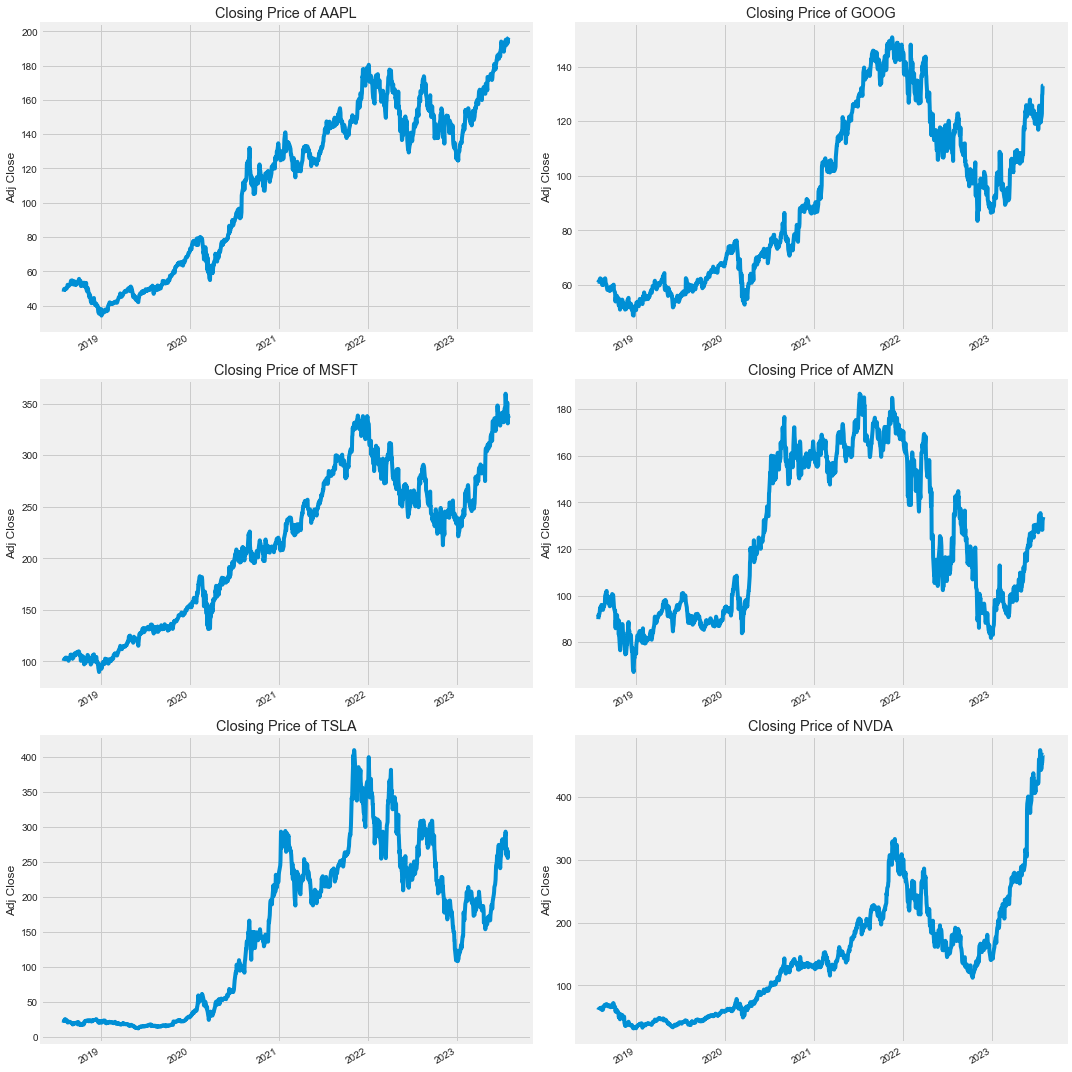

In [66]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

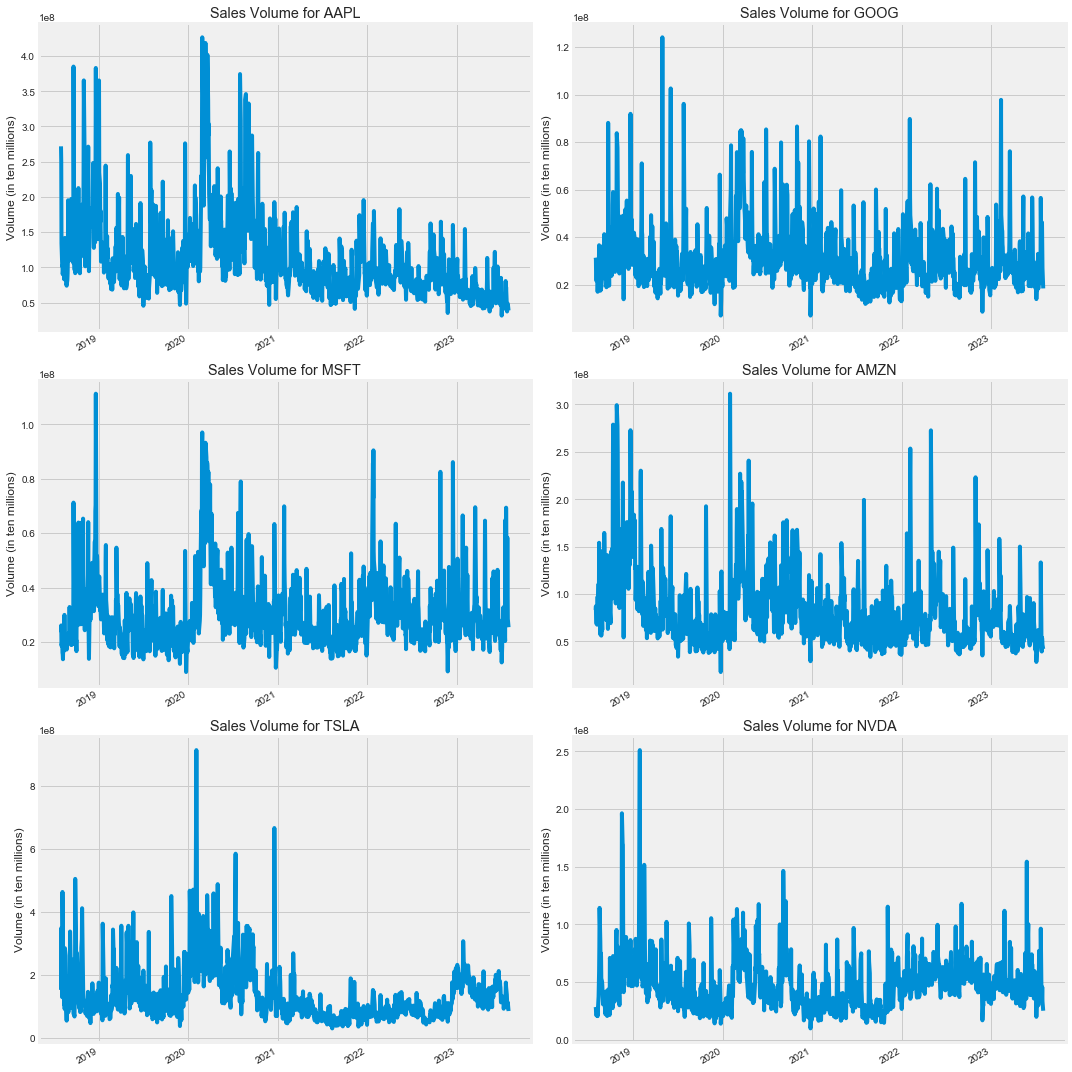

In [67]:
# Plotting the total volume of stock being traded each day
plt.figure(figsize=(15, 15))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume (in ten millions)')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

## 2) What was the moving average of the stocks?

Showing three moving averages: 10 day, 20 day and 50 day.

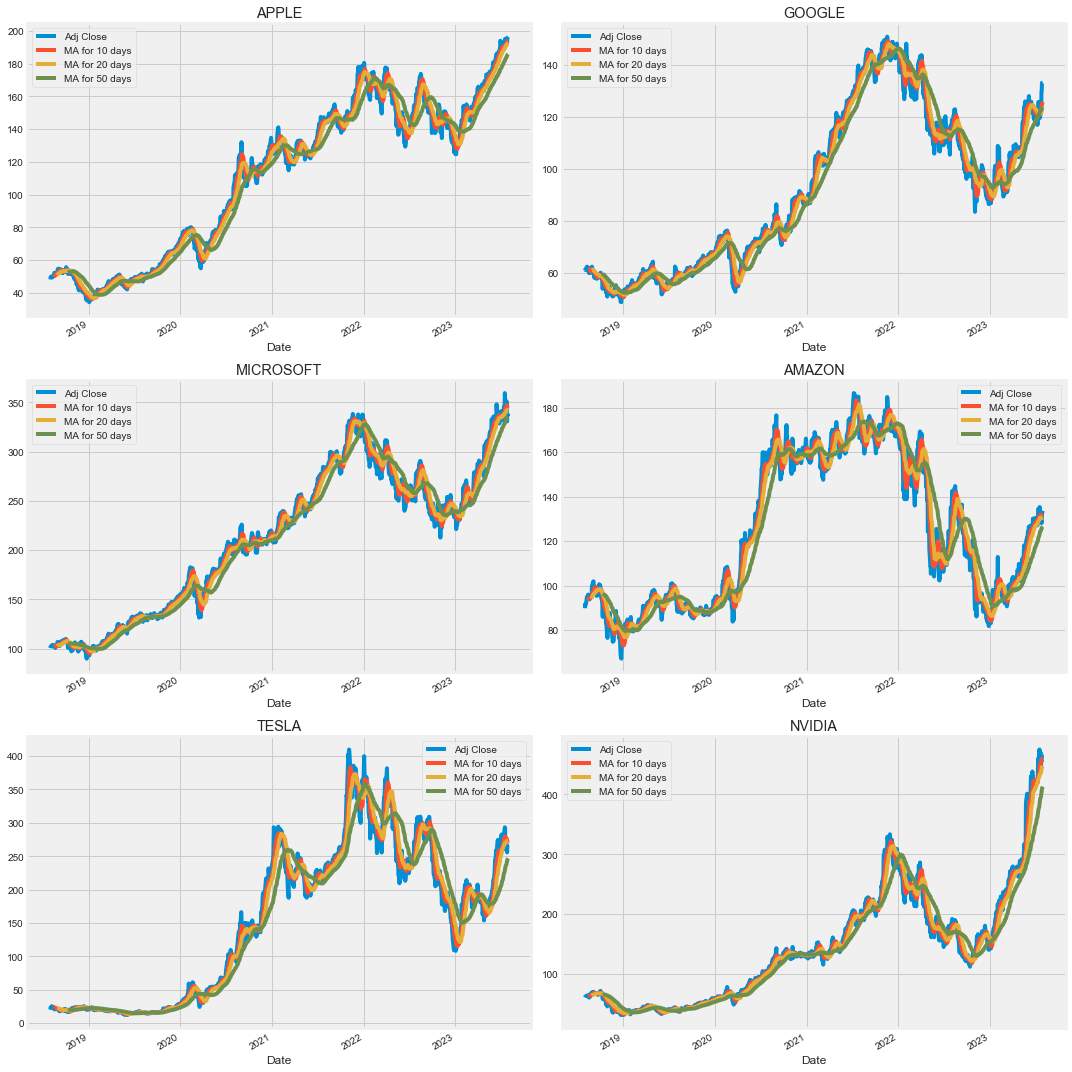

In [68]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('TESLA')

NVDA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('NVIDIA')

fig.tight_layout()

## 3) What was the daily return of the stock on average?

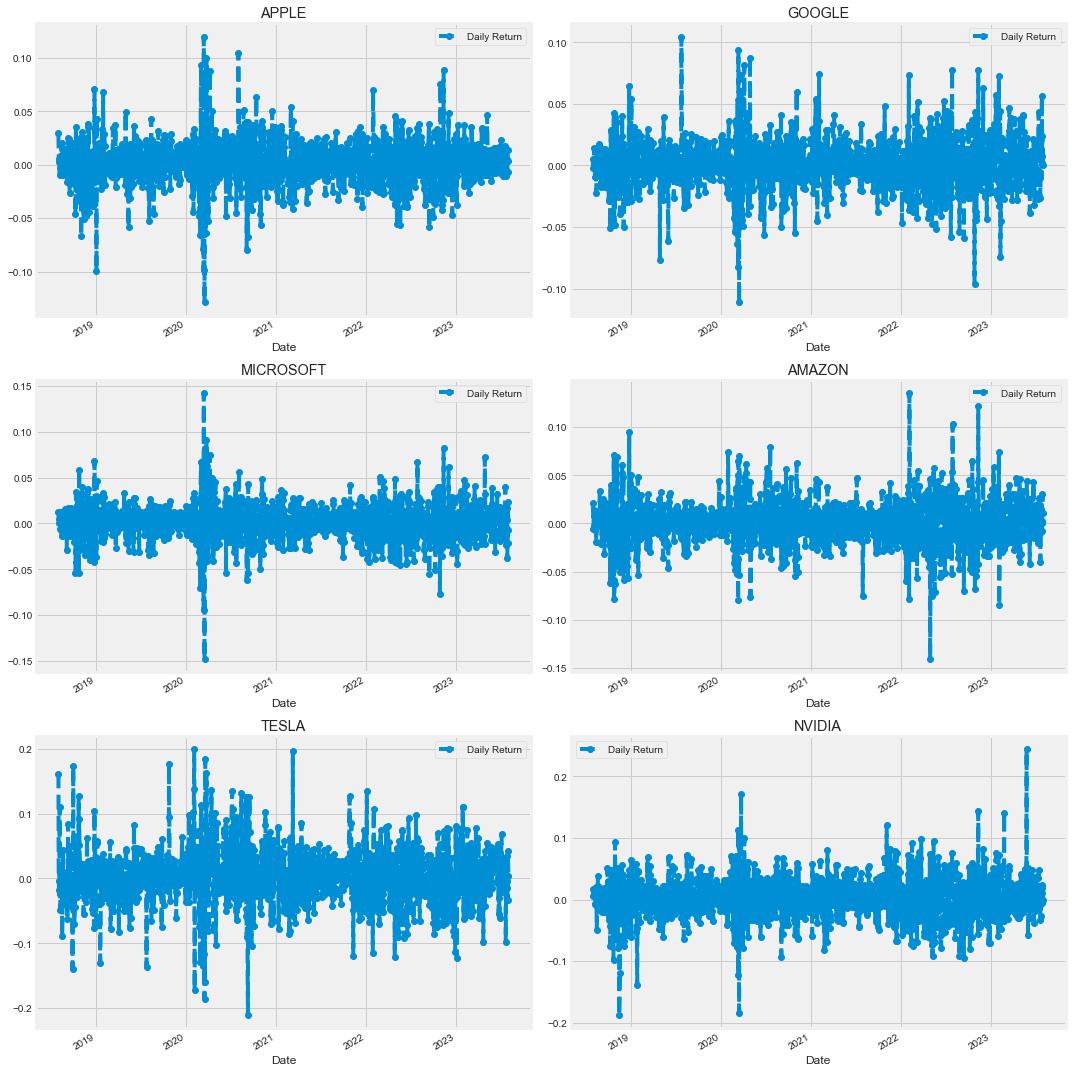

In [69]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

TSLA['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('TESLA')

NVDA['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('NVIDIA')

fig.tight_layout()

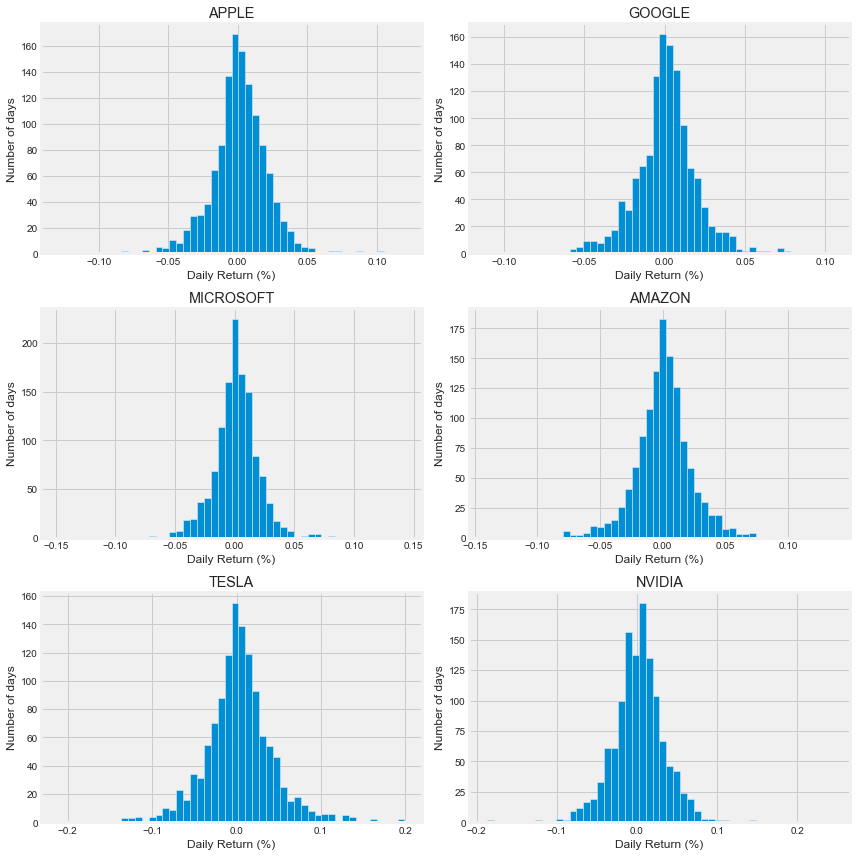

In [70]:
# plotting the daily percent change of each company as a histogram
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return (%)')
    plt.ylabel('Number of days')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

## 4) What was the correlation between different stock clossing prices?

In [71]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  6 of 6 completed


,AAPL,AMZN,GOOG,MSFT,NVDA,TSLA
Date,,,,,,
2018-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-02,0.029231,0.020677,0.005033,0.012138,0.016838,0.161880
2018-08-03,0.002893,-0.006019,-0.001990,0.004369,0.005905,-0.003920
2018-08-06,0.005192,0.013415,0.000866,0.000833,0.007656,-0.017750
2018-08-07,-0.009375,0.007972,0.014248,0.006936,0.011495,0.109886


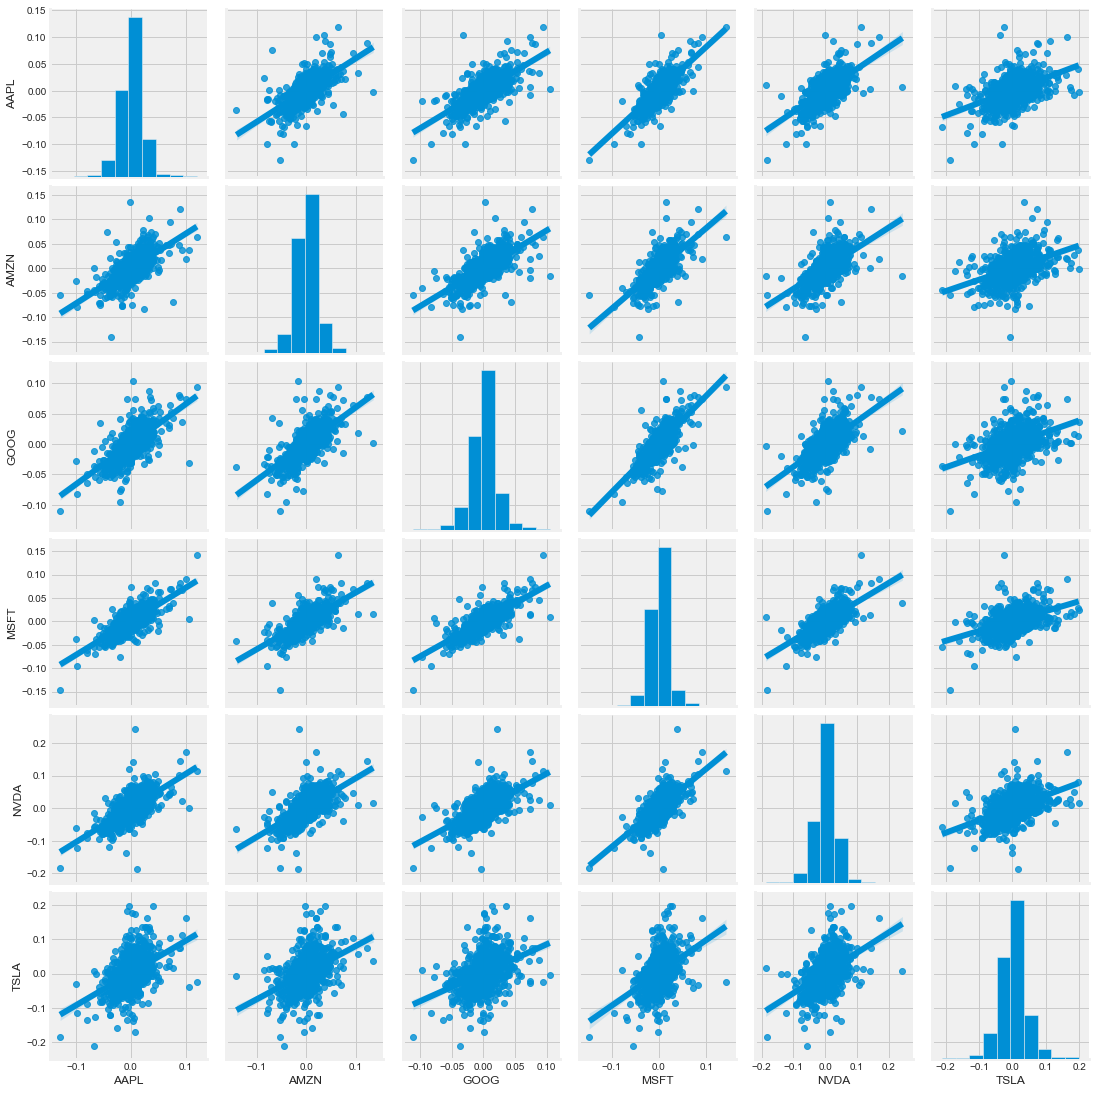

In [72]:
sns.pairplot(tech_rets, kind='reg')

Text(0.5, 1, 'Correlation of stock closing price')

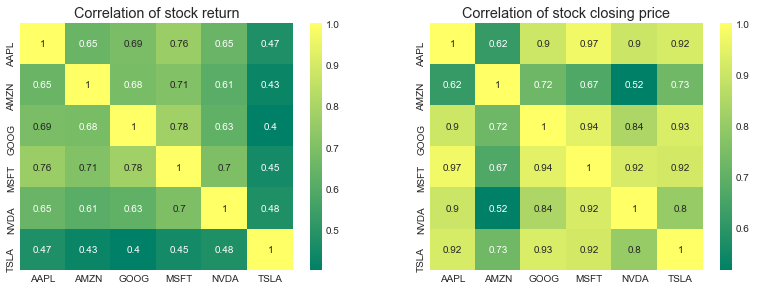

In [73]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

All the technology companies are positively correlated. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple. Microsoft and Amazon had the strongest correlation of daily stock return.

## 5) How much value do we put at risk by investing in a particular stock?

We can compare the expected return with the standard deviation of the daily returns. Microsoft and Apple are less risky. Nvidia and Tesla are riskier stocks.

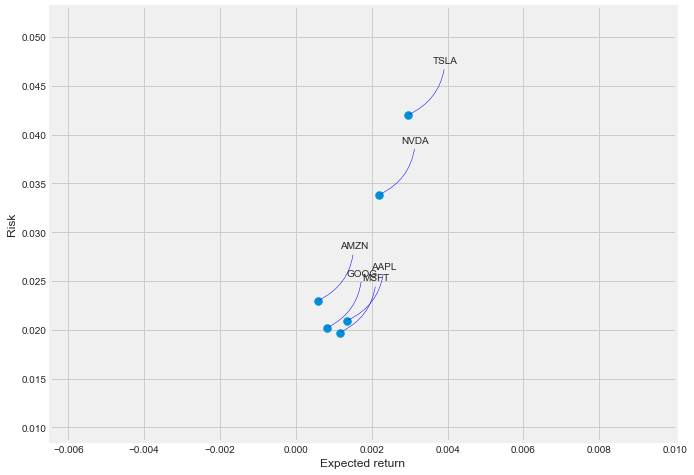

In [83]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## 6) Predicting the closing stock price of AAPL using ARIMA.

ARIMA is a statistical model that assumes that future will resemble the past, and it used to predict future values based on past values. It makes use of lagged moving averages to smooth time series data. The model parameters are (p, d, q). p gives the number of lag observations in the model, d is the number of times the raw observations are differenced and q is the size of the moving window.

In [84]:
# Making a data frame of just the apple price.
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482924,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550012,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689342,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821995,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801654,394024400
...,...,...,...,...,...,...
2023-07-28,194.669998,196.630005,194.139999,195.830002,195.830002,48291400
2023-07-31,196.059998,196.490005,195.259995,196.449997,196.449997,38824100
2023-08-01,196.240005,196.729996,195.279999,195.610001,195.610001,35175100


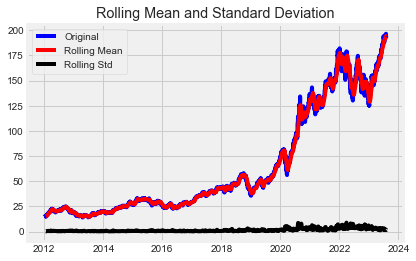

Results of dickey fuller test
Test Statistics                   1.064916
p-value                           0.994906
No. of lags used                 26.000000
Number of observations used    2888.000000
critical value (1%)              -3.432616
critical value (5%)              -2.862541
critical value (10%)             -2.567303
dtype: float64


In [96]:
#Test for staionarity
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df['Close'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

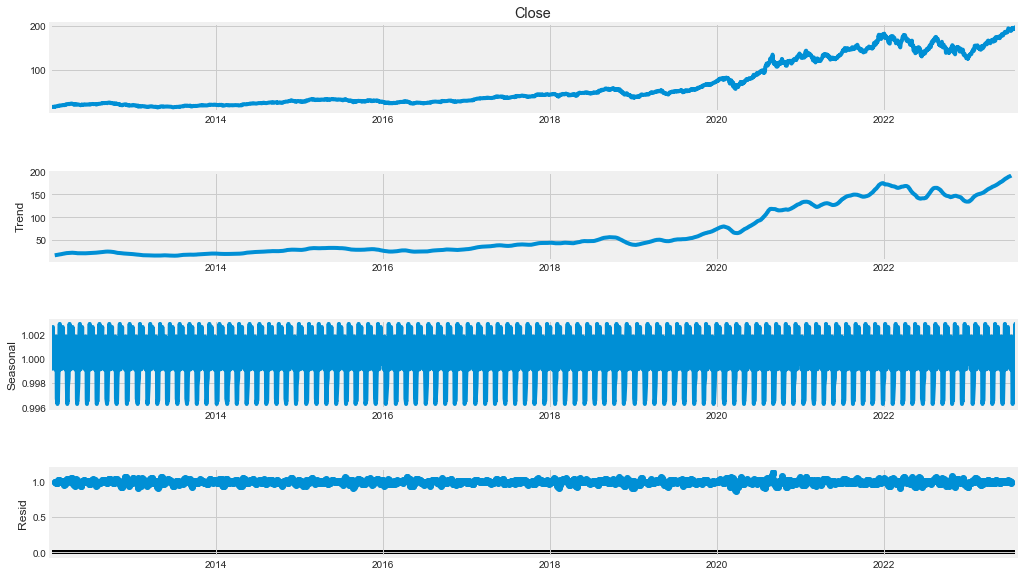

In [98]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(df['Close'], model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


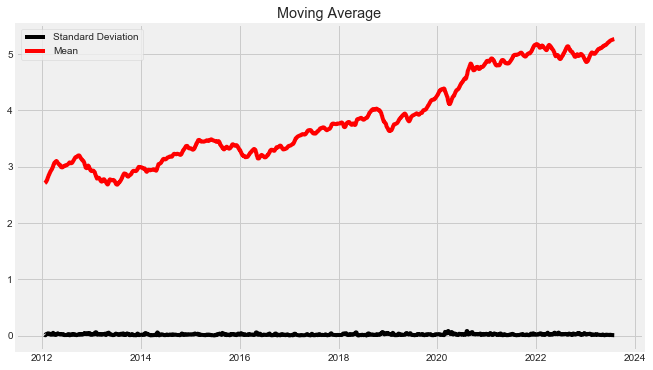

In [100]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df['Close'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

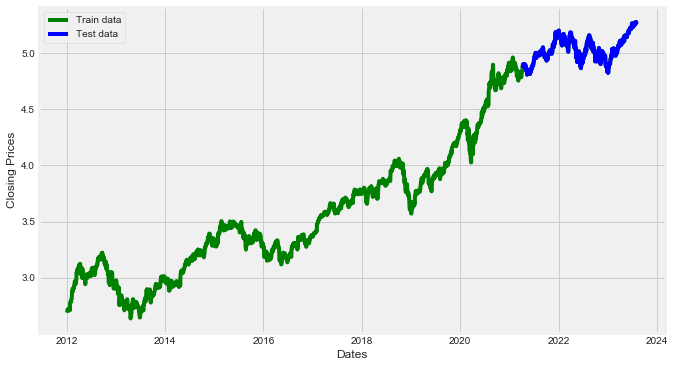

In [102]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.8)], df_log[int(len(df_log)*0.8):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [104]:
#Modeling
# Build Model
model = ARIMA(train_data, order=(5,1,0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2328
Model:                 ARIMA(5, 1, 0)   Log Likelihood                6029.353
Method:                       css-mle   S.D. of innovations              0.018
Date:                Thu, 03 Aug 2023   AIC                         -12044.706
Time:                        11:48:49   BIC                         -12004.437
Sample:                             1   HQIC                        -12030.034
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0009      0.000      2.628      0.009       0.000       0.002
ar.L1.D.Close    -0.0632      0.021     -3.049      0.002      -0.104      -0.023
ar.L2.D.Close     0.0006      0.021     

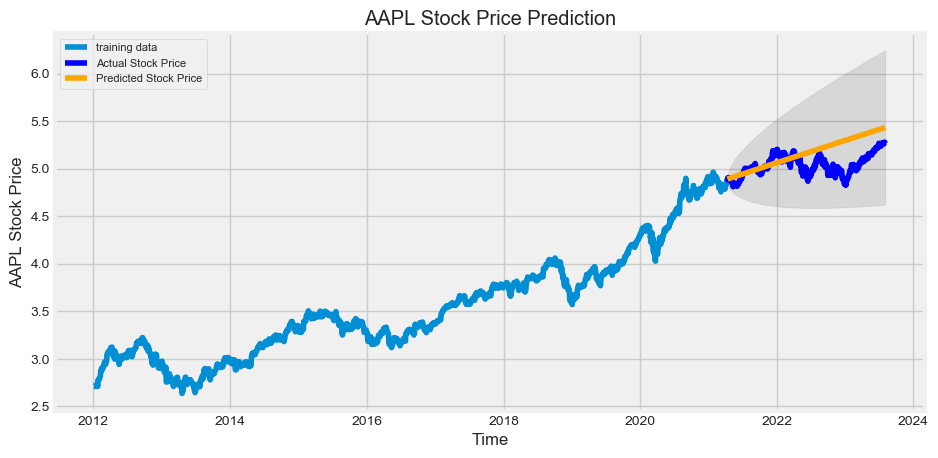

In [107]:
# Forecast
fc, se, conf = fitted.forecast(583, alpha=0.05)  # 95% conf
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()